# **1. Perkenalan Dataset**



Dataset yang digunakan pada eksperimen ini merupakan dataset Titanic yang berisi data penumpang kapal Titanic. 
Dataset terdiri dari fitur-fitur numerik hasil preprocessing yang disimpan dalam bentuk file NumPy.

- Jumlah data: ±891 baris
- Jumlah fitur: 13 fitur numerik
- Target: status kelangsungan hidup penumpang (survived)

Dataset telah melalui proses preprocessing sebelumnya, meliputi:
- Seleksi fitur numerik
- Encoding dan normalisasi
- Penyimpanan dalam bentuk file `X.npy` dan `y.npy`

Dataset ini digunakan untuk melatih model klasifikasi Logistic Regression dengan tujuan memprediksi apakah penumpang selamat atau tidak.


# **2. Import Library**

In [108]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np


# **3. Memuat Dataset**

In [109]:
df = pd.read_csv("Titanic-Dataset.csv", sep=',')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **4. Exploratory Data Analysis (EDA)**


In [110]:
# ukuran data
df.shape


(891, 12)

Dataset memiliki 12 fitur dan 891 baris

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Dataset ini memiliki beberapa tipe data diantaranya integer, object, dan float

In [112]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ada beberapa fitur di data yang memiliki missing value, yaitu fitur "Age" dengan 177 missing value, "Cabin" dengan 687 missing value, dan "Embarked" dengan 2 missing value

In [113]:
df.duplicated().sum()

0

Untuk duplikat di data ini kebetulan tidak ada

In [114]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Berikut adalh descriptive statistik mengenai dataset ini

In [115]:
df['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

Dengan persebaran target di 342 yang selamat dan 549 yang tidak selamat

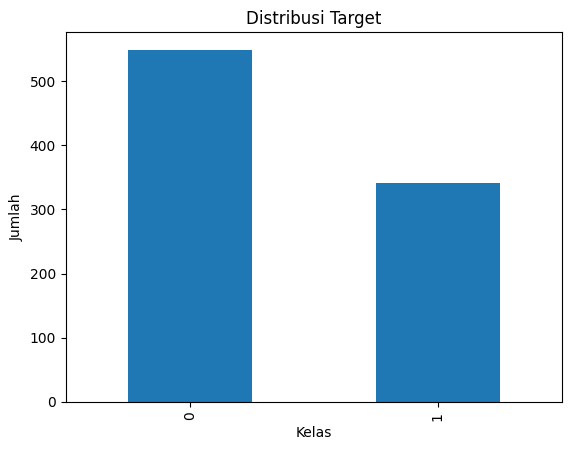

In [116]:
import matplotlib.pyplot as plt

df['Survived'].value_counts().plot(kind='bar')
plt.title("Distribusi Target")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.show()

Karena perbadaan data tidak terlalu ekstrim jadi tidak diperlukan Balancing data

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan:


## 1. Menghapus atau Menangani Data Kosong

- Untuk fitur "Age" saya melakukan imputasi dengan Median
- Fitur "Embarked" saya imputasi pakai Modus
- Dan fitur "Cabin" saya pilih drop kolom karena terlalu banyak kolom yang kosong, jika dilakukan imputasi takutnya malah merusak karakteristik data

In [117]:
# Menghapus atau Menangani Data Kosong (Missing Values)
df.isnull().sum()
# Age: isi dengan median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Embarked: isi dengan modus
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Cabin: terlalu banyak kosong → drop kolom
df = df.drop(columns=['Cabin'])


## 2. Menghapus Data Duplikat

Karena tidak ada duplikasi, jadi ukuran data sebelum dan sesudah tetap sama

In [118]:
# Menghapus Data Duplikat
print("Sebelum:", df.shape)
df = df.drop_duplicates()
print("Sesudah:", df.shape)


Sebelum: (891, 11)
Sesudah: (891, 11)


In [119]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## 3. Encoding Data Categorical

Yaitu fitur "Sex" dan "Embarked" dengan:
- Sex : Male dan Femal
- Embarked : C, S, Q

In [120]:
# Encoding Data Categorical
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,True,False,False


## 4. Binning

Saya melakukan pengelompokan pada fitur "Age" dengan kriteria:
| Rentang Umur | Kategori   |
| ------------ | ---------- |
| 0–12         | Child      |
| 12–18        | Teen       |
| 18–35        | YoungAdult |
| 35–60        | Adult      |
| 60–100       | Senior     |


In [121]:
# Binning (Pengelompokan Data)
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 12, 18, 35, 60, 100],
    labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior']
)

df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True)
df


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,AgeGroup_Teen,AgeGroup_YoungAdult,AgeGroup_Adult,AgeGroup_Senior
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,True,False,True,False,True,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,False,False,True,False,True,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,False,False,True,False,True,False,False
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,True,False,False,False,True,False,False


## 5. Normalisasi atau Standaridasi Fitur

Perlu dilakukan supaya semua variabel punya skala yang sebanding

In [122]:
# Normalisasi atau Standarisasi Fitur
target_col = 'Survived'

X = df.drop(columns=[target_col, 'Name', 'Ticket'])
y = df[target_col]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.73010796,  0.82737724, -0.56573646, ...,  0.81573314,
        -0.52931315, -0.15911146],
       [-1.72622007, -1.56610693,  0.66386103, ..., -1.2258911 ,
         1.88924079, -0.15911146],
       [-1.72233219,  0.82737724, -0.25833709, ...,  0.81573314,
        -0.52931315, -0.15911146],
       ...,
       [ 1.72233219,  0.82737724, -0.1046374 , ...,  0.81573314,
        -0.52931315, -0.15911146],
       [ 1.72622007, -1.56610693, -0.25833709, ...,  0.81573314,
        -0.52931315, -0.15911146],
       [ 1.73010796,  0.82737724,  0.20276197, ...,  0.81573314,
        -0.52931315, -0.15911146]])

## 6. Handling Ouliers

Proses ini bertujuan untuk **menghapus outlier (data pencilan)** dari fitur agar dataset menjadi lebih bersih sebelum digunakan untuk pelatihan model. Outlier adalah nilai yang sangat jauh dari mayoritas data dan dapat mengganggu kinerja model karena bisa menarik pola ke arah yang tidak representatif. Metode yang digunakan adalah **Interquartile Range (IQR)**, yaitu pendekatan statistik yang fokus pada sebaran data bagian tengah sehingga lebih robust terhadap nilai ekstrem.

Dengan metode ini, data dianggap normal jika berada di antara batas bawah dan batas atas yang dihitung dari Q1 (kuartil 25%), Q3 (kuartil 75%), dan IQR (Q3 − Q1). Data yang berada di luar rentang tersebut akan dihapus dari dataset. Pendekatan ini membantu menjaga kualitas data tanpa terlalu dipengaruhi nilai ekstrem.

Penggunaan batas **3.0 × IQR** dipilih karena lebih longgar dibanding standar 1.5 × IQR. Artinya, hanya nilai yang benar-benar ekstrem yang dihapus. Ini cocok untuk dataset berukuran kecil hingga menengah seperti Titanic, agar tidak terlalu banyak data yang terbuang.

**Manfaat utama:**

* Mengurangi noise dari data ekstrem
* Membuat model lebih stabil
* Membantu meningkatkan akurasi prediksi
* Menjaga mayoritas data tetap dipakai untuk training



In [123]:
# Handling Outliers
X_df = pd.DataFrame(X_scaled)

Q1 = X_df.quantile(0.25)
Q3 = X_df.quantile(0.75)
IQR = Q3 - Q1

mask = ~(
    (X_df < (Q1 - 3.0 * IQR)) |
    (X_df > (Q3 + 3.0 * IQR))
).any(axis=1)

    

print("X sebelum outlier :", X_scaled.shape)
print("mask :", mask.shape)

X_clean = X_scaled[mask.values]
y_clean = y.iloc[mask.values]

print("X sesudah outlier :", X_scaled.shape)
print("y sesudah outlier :", y.shape)

X sebelum outlier : (891, 13)
mask : (891,)
X sesudah outlier : (891, 13)
y sesudah outlier : (891,)


## Simpan Dataset

Data disimpan terpisah menjadi X dan y karena dalam machine learning fitur dan label memiliki peran berbeda. X berisi informasi yang digunakan model untuk belajar, sedangkan y berisi jawaban atau target yang ingin diprediksi. Pemisahan ini adalah standar dalam workflow machine learning dan memudahkan saat melakukan training, evaluasi, atau pembagian data train-test.

Format .npy dipilih karena merupakan format asli NumPy yang dirancang khusus untuk menyimpan array.

In [124]:
np.save("X.npy", X_scaled)
np.save("y.npy", y.values)